## Comparando as performances



**Objetivo**: Compare a performance de três algoritmos diferentes de otimização (busca aleatória, busca em grade e algoritmos genéticos) para resolver o problema das caixas binárias.

**Lembrete**: nós estudamos performance de algoritmos durante lógica computacional.

**Dica**: O enunciado do objetivo não definiu o número de caixas. É esperado de um cientista que ele entenda que não adianta resolver esse problema para apenas um valor de $n$ caixas, mas sim buscar uma tendência resolvendo esse problema para alguns valores de $n$ diferentes. Fique atento pois essa dica não será mais dada a partir de agora mesmo que seja necessário usar desse bom senso científico em problemas futuros.

**Dica 2**: Lembre-se de que o único algoritmo determinístico dos três sendo estudados é o de busca em grade. Sendo assim, é esperado que um cientista entenda que situações não-determinísticas demandam o uso de estatística para quantificar um valor médio de performance e seu desvio. Novamente, fique atento pois essa dica não será mais dada a partir de agora.

**Nome do arquivo**: &ldquo;experimento GA.02 - performance caixas binarias&rdquo;



<hr>



## Importações

Neste caso, terei que importar todos os códigos utilizados nos primeiros três experimentos, visto que o nosso objetivo é comparar a performance deles.

In [1]:
from funcoes import individuo_cb, funcao_objetivo_cb
import time
import itertools
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from funcoes import populacao_cb as cria_populacao_cb
from funcoes import funcao_objetivo_pop_cb as funcao_objetivo_pop
from funcoes import funcao_objetivo_cb as funcao_objetivo
from funcoes import selecao_roleta_max as funcao_selecao
from funcoes import cruzamento_ponto_simples as funcao_cruzamento
from funcoes import mutacao_cb as funcao_mutacao
########## SPOILER: OTIMIZAÇÃO? ##########
import timeit
import numpy as np
from timeit import Timer

## Códigos e discussão
O experimento entregue a primeiro momento não foi realizado com foco no objetivo "verdadeiro" do problema proposto.
Dessa forma, eu e o professor julgamos melhor que eu refaça o exercício agora com uma meta bem definida. 
A seguir, estão as resoluções para o problema das caixas binárias com o uso de: busca aleatória (30 iterações), busca em grade (1 "repetição" = 30 repetições) e algoritmo genético (também 30 iterações, as quais são dadas pelo produto entre o número de gerações e o tamanho da população).

#### Problema 1 

In [2]:
def espaco_total(n_de_espacos):
    espacos = [random.randint(0, 1) for _ in range(n_de_espacos)]
    return espacos
# Primeiro, definimos a função responsável por criar a lista com um determinado número de caixas, ou, como eu prefiro chamá-los, espaços.
# Com isso, criamos uma variável chamada espacos, a qual será uma lista que contém determinado número de elementos, os quais
# podem receber valores entre zero e um, por meio do método `random.randint`.
# Finalmente, a função retornará essa lista. Segue um exemplo:

teste = espaco_total(4)
print("Exemplo de lista com 4 espaços aleatórios")
print(teste)
print()


def soma_espacos(espacos):
    soma = sum(espacos)
    return soma
# A seguir, definimos uma função que será responsável por retornar a soma dos elementos dentro da lista "espacos"
# Segue um exemplo:

print("Exemplo de uso da função soma_espacos")
print(soma_espacos(teste))
print()



def busca_aleatoria(num_iteracoes, n_de_espacos):
    melhor_soma = 0
    melhor_caixa = []
    for i in range(num_iteracoes):
        espaco_atual = espaco_total(n_de_espacos)
        soma_atual = soma_espacos(espaco_atual)
        if soma_atual > melhor_soma:
            melhor_soma = soma_atual
            melhor_caixa = espaco_atual
    return melhor_caixa, melhor_soma
# Agora, vamos criar uma nova função que utilize as outras funções que criamos a fim de tentar resolver 
# o problema da "caixa binária" de forma generalizada.
# Começamos definindo uma variável de valor zero chamada "melhor_soma", e 
# uma chamada "melhor_caixa", a qual é uma lsita vazia. Após isso, iniciamos
# um for loop, no qual iremos iterar uma variável um número de i vezes pela extensão de 
# determinada constante, chamada de num_iteracoes, cujo nome é autoexplicativo.
# Com isso, criamos uma nova variável, espaco_atual, a qual irá receber o valor 
# da função `espaco_total(n_de_espacos)`. De maneira semelhante, a variável soma_atual
# receberá o valor de `soma_espacos(espaco_atual)`.
# Após isso, fazemos um condicional if, o qual verifica que, se a soma atual for 
# maior que a melhor_soma, a melhor_soma será substituída pela soma_atual,
# de maneira semelhante, se a soma atual for maior que a melhor_soma, a 
# variável melhor_caixa será substituída pelo espaco_atual.
# Finalmente, a nossa função irá retornar esses valores substituídos. Segue um exemplo:

num_iteracoes = 1000
n_de_espacos = 5
melhor_caixa, melhor_soma = busca_aleatoria(num_iteracoes, n_de_espacos)
print(f"Melhor combinação de caixas após {num_iteracoes} iterações: {melhor_caixa}")
print(F"Soma dos valores contidos nas caixas: {melhor_soma}")

Exemplo de lista com 4 espaços aleatórios
[1, 1, 0, 1]

Exemplo de uso da função soma_espacos
3

Melhor combinação de caixas após 1000 iterações: [1, 1, 1, 1, 1]
Soma dos valores contidos nas caixas: 5


In [3]:
iteracoes_exp = 30
espacos_ex = 2
EXECS = 5
tempo_total = 0
START = time.perf_counter()
for i in range(EXECS):
    

    melhor_caixa, melhor_soma = busca_aleatoria(iteracoes_exp, espacos_ex)

END = time.perf_counter()
tempo_total = (END - START)
    
MEDIA_BA0 = (tempo_total / EXECS)

print(f"{MEDIA_BA0:7f}")
print(f"A maior soma alcançada após {iteracoes_exp} iterações foi de: {melhor_soma}")

0.000094
A maior soma alcançada após 30 iterações foi de: 2


In [4]:
iteracoes_exp = 30
espacos_ex = 5
EXECS = 5
tempo_total = 0
START = time.perf_counter()
for i in range(EXECS):
    

    melhor_caixa, melhor_soma = busca_aleatoria(iteracoes_exp, espacos_ex)

END = time.perf_counter()
tempo_total = (END - START)
    
MEDIA_BA1 = (tempo_total / EXECS)

print(f"{MEDIA_BA1:7f}")
print(f"A maior soma alcançada após {iteracoes_exp} iterações foi de: {melhor_soma}")

0.000308
A maior soma alcançada após 30 iterações foi de: 5


In [5]:
iteracoes_exp = 30
espacos_ex = 10
EXECS = 5
tempo_total = 0
START = time.perf_counter()
for i in range(EXECS):
    

    melhor_caixa, melhor_soma = busca_aleatoria(iteracoes_exp, espacos_ex)

END = time.perf_counter()
tempo_total = (END - START)
    
MEDIA_BA2 = (tempo_total / EXECS)

print(f"{MEDIA_BA2:7f}")
print(f"A maior soma alcançada após {iteracoes_exp} iterações foi de: {melhor_soma}")

0.000955
A maior soma alcançada após 30 iterações foi de: 9


In [6]:
iteracoes_exp = 30
espacos_ex = 15
EXECS = 5
tempo_total = 0
START = time.perf_counter()
for i in range(EXECS):
    

    melhor_caixa, melhor_soma = busca_aleatoria(iteracoes_exp, espacos_ex)

END = time.perf_counter()
tempo_total = (END - START)
    
MEDIA_BA3 = (tempo_total / EXECS)

print(f"{MEDIA_BA3:7f}")
print(f"A maior soma alcançada após {iteracoes_exp} iterações foi de: {melhor_soma}")

0.001122
A maior soma alcançada após 30 iterações foi de: 11


In [7]:
iteracoes_exp = 30
espacos_ex = 20
EXECS = 5
tempo_total = 0
START = time.perf_counter()
for i in range(EXECS):
    

    melhor_caixa, melhor_soma = busca_aleatoria(iteracoes_exp, espacos_ex)

END = time.perf_counter()
tempo_total = (END - START)
    
MEDIA_BA4 = (tempo_total / EXECS)

print(f"{MEDIA_BA4:7f}")
print(f"A maior soma alcançada após {iteracoes_exp} iterações foi de: {melhor_soma}")

0.001228
A maior soma alcançada após 30 iterações foi de: 15


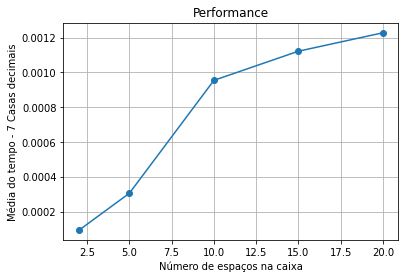

In [8]:
y = lista_medias = [MEDIA_BA0, MEDIA_BA1, MEDIA_BA2, MEDIA_BA3, MEDIA_BA4]
x = lista_espacos = [2, 5, 10, 15, 20]
plt.plot(x,y, '-o')
plt.xlabel('Número de espaços na caixa')
plt.ylabel('Média do tempo - 7 Casas decimais')
plt.title('Performance')
plt.grid(True)
plt.show()

In [9]:
def recursao_ba(num_iteracoes,n_de_espacos):
    melhor_soma = 0
    melhor_caixa = []
    #
            
    while melhor_soma != n_de_espacos:
        espaco_atual = espaco_total(n_de_espacos)
        soma_atual = soma_espacos(espaco_atual)
        if soma_atual > melhor_soma:
            melhor_soma = soma_atual
            melhor_caixa = espaco_atual
    
    return melhor_caixa, melhor_soma


In [23]:
EXECS = 1
tempo_total = 0
START = time.perf_counter()
for i in range(EXECS):
    recursao_ba(5,19)

END = time.perf_counter()
tempo_total = (END - START)
    
MEDIA_BA_W = (tempo_total / EXECS)


#print(recursao_ba(5,20))
print(f" O experimento demorou um total de {MEDIA_BA_W} segundos")

 O experimento demorou um total de 2.2544201999999984 segundos


media do tempo=> y 
enquanto o eixo x vai ser o numero de caixas/espacos
buscar inspiração na senha do alg gen.

Vale lembrar que o objetivo deste primeiro algoritmo usado é encontrar o maior resultado da soma das casas da nossa caixa binária. Ele faz isso através de tentativa e erro, por isso, o esperado é que o tempo que ele demora para ser executado irá aumentar conforme mais casas e/ou mais possibilidades de números nessas casas (mas o problema não seria uma caixa binária nesse caso).

#### Problema 2

In [11]:
import time
import itertools

EXECS = 1
tempo_total = 0

for i in range(EXECS):
    START = time.perf_counter()

    for individuo in itertools.product([0, 1], repeat=5):
        fobj = funcao_objetivo(individuo) #- 1
        # vou deixar o print dos individuos obtidos para ver o erro (+1) que está acontecendo
        #print(individuo, fobj)

    END = time.perf_counter()
    tempo_total += (END - START)

MEDIA_A = (tempo_total / EXECS)
print(f"O tempo necessário para realizar o experimento foi de: {MEDIA_A:.7f} segundos")

O tempo necessário para realizar o experimento foi de: 0.0000273 segundos


In [12]:
import time
import itertools

EXECS = 5
tempo_total = 0

for i in range(EXECS):
    START = time.perf_counter()

    for individuo in itertools.product([0, 1], repeat=5):
        fobj = funcao_objetivo(individuo) #- 1
        # vou deixar o print dos individuos obtidos para ver o erro (+1) que está acontecendo
        print(individuo, fobj)

    END = time.perf_counter()
    tempo_total += (END - START)

MEDIA_B = (tempo_total / EXECS)
print(f"O tempo necessário para realizar o experimento foi de: {MEDIA_B:.7f} segundos")

(0, 0, 0, 0, 0) 1
(0, 0, 0, 0, 1) 2
(0, 0, 0, 1, 0) 2
(0, 0, 0, 1, 1) 3
(0, 0, 1, 0, 0) 2
(0, 0, 1, 0, 1) 3
(0, 0, 1, 1, 0) 3
(0, 0, 1, 1, 1) 4
(0, 1, 0, 0, 0) 2
(0, 1, 0, 0, 1) 3
(0, 1, 0, 1, 0) 3
(0, 1, 0, 1, 1) 4
(0, 1, 1, 0, 0) 3
(0, 1, 1, 0, 1) 4
(0, 1, 1, 1, 0) 4
(0, 1, 1, 1, 1) 5
(1, 0, 0, 0, 0) 2
(1, 0, 0, 0, 1) 3
(1, 0, 0, 1, 0) 3
(1, 0, 0, 1, 1) 4
(1, 0, 1, 0, 0) 3
(1, 0, 1, 0, 1) 4
(1, 0, 1, 1, 0) 4
(1, 0, 1, 1, 1) 5
(1, 1, 0, 0, 0) 3
(1, 1, 0, 0, 1) 4
(1, 1, 0, 1, 0) 4
(1, 1, 0, 1, 1) 5
(1, 1, 1, 0, 0) 4
(1, 1, 1, 0, 1) 5
(1, 1, 1, 1, 0) 5
(1, 1, 1, 1, 1) 6
(0, 0, 0, 0, 0) 1
(0, 0, 0, 0, 1) 2
(0, 0, 0, 1, 0) 2
(0, 0, 0, 1, 1) 3
(0, 0, 1, 0, 0) 2
(0, 0, 1, 0, 1) 3
(0, 0, 1, 1, 0) 3
(0, 0, 1, 1, 1) 4
(0, 1, 0, 0, 0) 2
(0, 1, 0, 0, 1) 3
(0, 1, 0, 1, 0) 3
(0, 1, 0, 1, 1) 4
(0, 1, 1, 0, 0) 3
(0, 1, 1, 0, 1) 4
(0, 1, 1, 1, 0) 4
(0, 1, 1, 1, 1) 5
(1, 0, 0, 0, 0) 2
(1, 0, 0, 0, 1) 3
(1, 0, 0, 1, 0) 3
(1, 0, 0, 1, 1) 4
(1, 0, 1, 0, 0) 3
(1, 0, 1, 0, 1) 4
(1, 0, 1, 1, 0) 4
(1, 0, 1, 

In [13]:
MEDIA_BG = (MEDIA_A + MEDIA_B)/2
print(f"A média entre a busca em grade realizada 1 vez VS realizada 5 vezes foi de: {MEDIA_BG:.7f} segundos")

A média entre a busca em grade realizada 1 vez VS realizada 5 vezes foi de: 0.0010992 segundos


Neste caso, não foi necessário mudar alguma variável ou fazer um laço de repetição para alcançar as 30 iterações, visto que, convenientemente, para a busca em grade do produto de `[0,1]` 5 vezes alcançar a maior soma dos indivíduos dentro da caixa (5), são necessárias 30 iterações.

Mesmo assim, para a "disputa" entre os algoritmos/métodos ser justa, optei realizar a busca em grade também com EXECS=5 para ver como isso afeta seu desempenho. 

Para finalizar, fiz uma média dos tempos necessários para realizar esses dois processos.

#### Problema 3
Neste caso, minha abordagem inicial foi utilizar o algoritmo genético feito em aula. No entanto, percebi que ao mudar algumas variáveis, o código retornava erros em relação ao "tamanho da lista". Isso mudava conforme o valor de ** era mudado, e isto foi comprovado por meio de três testes.
Assim, ao não poder prosseguir com o primeiro algoritmo criado em classe, preferi usar o módulo DEAP, o qual nos foi ensinado em uma aula adicional da disciplica. A seguir, a resolução por meio do módulo DEAP.

In [14]:
# constantes

tamanho_pop = 5
numero_genes = 5
numero_geracoes = 5
chance_cruzamento = 0.5
chance_mutacao = 0.05

bom_fit = float("inf")

In [15]:
while bom_fit != 0:   

IndentationError: expected an indented block (Temp/ipykernel_2660/1164184819.py, line 1)

In [ ]:
EXECS = 5
tempo_total = 0
print("Teste I")
START = time.perf_counter()
for i in range(EXECS):
    

    populacao = cria_populacao_cb(tamanho_pop,numero_genes)

    print("População inicial:")
    print(populacao)

    for n in range(numero_geracoes):
        fitness = funcao_objetivo_pop(populacao)
        populacao = funcao_selecao(populacao,fitness)
        pais = populacao[0::2]
        maes = populacao[1::2]
        contador = 0
        for pai,mae in zip(pais,maes):
            if random.random() < chance_cruzamento:
                filho1,filho2 = funcao_cruzamento(pai,mae)
                populacao[contador] = filho1
                populacao[contador+1] = filho2
            
            contador = contador + 2
        
        for individuo in range(len(populacao)):
            if random.random() <= chance_mutacao:
                individuo = populacao[n-1] 
                print(f"Teste A populacao pre mutacao{populacao[n-1]}")
            
                populacao[n-1] = funcao_mutacao(individuo-1)
                print(f"Teste B populacao pos mutacao{populacao[n-1]}")
        
    print()
    print("População final:")
    print(populacao)

END = time.perf_counter()
tempo_total += (END - START)
    
MEDIA = (tempo_total / EXECS)
print(f"Tempo médio: {MEDIA:.7f} segundos")

In [ ]:
EXECS = 1
tempo_total = 0
print("Teste II")
for i in range(EXECS):
    START = time.perf_counter()

    populacao = cria_populacao_cb(tamanho_pop,numero_genes)

    print("População inicial:")
    print(populacao)

    for n in range(numero_geracoes):
        fitness = funcao_objetivo_pop(populacao)
        populacao = funcao_selecao(populacao,fitness)
        pais = populacao[0::2]
        maes = populacao[1::2]
        contador = 0
        for pai,mae in zip(pais,maes):
            if random.random() < chance_cruzamento:
                filho1,filho2 = funcao_cruzamento(pai,mae)
                populacao[contador] = filho1
                populacao[contador+1] = filho2
            
            contador = contador + 2
        
        for individuo in range(len(populacao)):
            if random.random() <= chance_mutacao:
                individuo = populacao[n]
                print(f"Teste A populacao pre mutacao{populacao[n]}")
            
                populacao[n] = funcao_mutacao(individuo)
                print(f"Teste B populacao pos mutacao{populacao[n]}")
        
    print()
    print("População final:")
    print(populacao)

END = time.perf_counter()
tempo_total += (END - START)
    
MEDIA_AG = (tempo_total / EXECS)
print(f"Tempo médio: {MEDIA_AG:.7f} segundos")

In [ ]:
EXECS = 1
tempo_total = 0
print("Teste III")
for i in range(EXECS):
    START = time.perf_counter()

    populacao = cria_populacao_cb(tamanho_pop,numero_genes)

    print("População inicial:")
    print(populacao)

    for n in range(numero_geracoes):
        fitness = funcao_objetivo_pop(populacao)
        populacao = funcao_selecao(populacao,fitness)
        pais = populacao[0::2]
        maes = populacao[1::2]
        contador = 0
        for pai,mae in zip(pais,maes):
            if random.random() < chance_cruzamento:
                filho1,filho2 = funcao_cruzamento(pai,mae)
                populacao[contador] = filho1
                populacao[contador+1] = filho2
            
            contador = contador + 2
        
        for individuo in range(len(populacao)):
            if random.random() <= chance_mutacao:
                individuo = populacao[n]
                print(f"Teste A populacao pre mutacao{populacao[n]}")
            
                populacao[n] = funcao_mutacao(individuo)
                print(f"Teste B populacao pos mutacao{populacao[n]}")
        
    print()
    print("População final:")
    print(populacao)

END = time.perf_counter()
tempo_total += (END - START)
    
MEDIA = (tempo_total / EXECS)
print(f"Tempo médio: {MEDIA:.7f} segundos")

#### Agora, a resolução com DEAP

In [ ]:
import deap
from deap import base
from deap import creator
from deap import tools

In [ ]:
from deap.algorithms import eaSimple
import numpy as np
np.random.seed(137)
import matplotlib.pyplot as plt
from funcoes import gene_cb

In [ ]:
NUM_CAIXAS = 5
TAMANHO_POP = 5
NUM_COMBATENTES_NO_TORNEIO = 3
CHANCE_MUTACAO_DE_CADA_GENE = 0.05
CHANCE_CRUZAMENTO = 0.7
CHANCE_MUTACAO = 0.2
NUM_GERACOES = 6
TAMANHO_HALL_DA_FAMA = 3

In [ ]:
creator.create("Fitness_max", base.Fitness, weights=(1.0,))

creator.create("Individuo", list, fitness=creator.Fitness_max)

toolbox = base.Toolbox()

toolbox.register(
    "individuo", tools.initRepeat, creator.Individuo, gene_cb, NUM_CAIXAS
)

toolbox.register(
    "populacao", tools.initRepeat, list, toolbox.individuo, TAMANHO_POP
)

def funcao_objetivo_cb(individuo):
    return (sum(individuo), )

toolbox.register("evaluate", funcao_objetivo_cb)

toolbox.register(
    "select", tools.selTournament, tournsize=NUM_COMBATENTES_NO_TORNEIO
)

toolbox.register("mate", tools.cxOnePoint)

toolbox.register("mutate", tools.mutFlipBit, indpb=CHANCE_MUTACAO_DE_CADA_GENE)

hall_da_fama = tools.HallOfFame(TAMANHO_HALL_DA_FAMA)

estatisticas = tools.Statistics(lambda ind: ind.fitness.values)
estatisticas.register("avg", np.mean)
estatisticas.register("std", np.std)
estatisticas.register("min", np.min)
estatisticas.register("max", np.max)

In [ ]:
EXECS = 5
tempo_total = 0
for i in range(EXECS):
    START = time.perf_counter()
    
creator.create("Fitness_max", base.Fitness, weights=(1.0,))
creator.create("Individuo", list, fitness=creator.Fitness_max)

toolbox = base.Toolbox()
toolbox.register("individuo", tools.initRepeat, creator.Individuo, gene_cb, NUM_CAIXAS)
toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo, TAMANHO_POP)

def funcao_objetivo_cb(individuo):
    return (sum(individuo),)

toolbox.register("evaluate", funcao_objetivo_cb)
toolbox.register("select", tools.selTournament, tournsize=NUM_COMBATENTES_NO_TORNEIO)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=CHANCE_MUTACAO_DE_CADA_GENE)

hall_da_fama = tools.HallOfFame(TAMANHO_HALL_DA_FAMA)

estatisticas = tools.Statistics(lambda ind: ind.fitness.values)
estatisticas.register("avg", np.mean)
estatisticas.register("std", np.std)
estatisticas.register("min", np.min)
estatisticas.register("max", np.max)

populacao_inicial = toolbox.populacao()

populacao_final, log = algorithms.eaSimple(
    populacao_inicial,
    toolbox,
    cxpb=CHANCE_CRUZAMENTO,
    mutpb=CHANCE_MUTACAO,
    ngen=NUM_GERACOES,
    stats=estatisticas,
    halloffame=hall_da_fama,
    verbose=True,
)

num_iteracoes = NUM_GERACOES * TAMANHO_POP

END = time.perf_counter()
tempo_total += (END - START)
    
MEDIA_AGD = (tempo_total / EXECS)
print(f"O tempo necessário para realizar o experimento com 5 espaços e {num_iteracoes} iterações foi de: {MEDIA_AGD:7f} segundos")
print(f"O número de iterações totais realizadas foi de: {num_iteracoes*EXECS} ")
print(f"E a população final obtida foi a seguinte {populacao_final}")

Após os resultados obtidos, é interessante perceber como o algoritmo genético não é uma "carta coringa" que irá funcionar/ser efetivo em qualquer problema no qual ele é aplicado. Essa afirmação é direcionada principalmente a algoritmos com parâmetros de geração e população **baixos**, visto que, no caso do experimento realizado, apenas foram 5 indivíduos na população das 6 gerações, o que não alcançou o objetivo da maior soma dos genes/espaços. 

#### COMPARAÇÕES

In [ ]:
print(f"""O tempo usado pela busca aleatória foi de {MEDIA_BA:.7f} segundos;
O tempo usado pela busca em grade (1 EXEC) foi de {MEDIA_A:.7f} segundos;
O tempo usado pela busca em grade (5 EXECS) foi de {MEDIA_B:.7f} segundos;
O tempo usado pela busca em grade (Média 5 e 1) foi de {MEDIA_BG:.7f} segundos;
O tempo usado pelo algoritmo genético sem DEAP foi de {MEDIA_AG:.7f} segundos;
O tempo usado pelo algoritmo genético com DEAP foi de {MEDIA_AGD:.7f} segundos
""")

## Conclusão

`[nova conclusao apos ter feito uma releitura do experimento e mudado tudo e tirado os graficos]`

criterio de parada: função objetivo